# DSO106 ML L5 NLP Walk Through
---


## Introduction to Natural Language Processing

So much information is presented only as the written or spoken word, yet most of the tools you have learned so far for dealing with data won't handle text! In this lesson, you'll learn a technique called *Natural Language Processing* to handle raw text data and turn it into something usable.  By the end of this lesson, you should be able to:

* Read in data from webpages
* Convert text to a usable format
* Utilize HTML tags to pull data parts
* Tokenize your data
* Use for loops to remove capitalization and stopwords
* Count words used in novels and chart the most frequent ones

This lesson will culminate in a hands-ons in which you find the most frequently occurring words in Lewis Carroll's *Alice's Adventures in Wonderland*.  Ready to start down the rabbit hole?

<div class="panel panel-success">
    <div class="panel-heading">
        <h3 class="panel-title">Additional Info!</h3>
    </div>
    <div class="panel-body">
        <p>You may want to watch this <a href="https://vimeo.com/441207100"> recorded live workshop </a> that goes over the material in this lesson. </p>
    </div>
</div>

---

In [1]:
from IPython.display import VimeoVideo
# Tutorial Video Name: Natural Language Processing
VimeoVideo('388630868', width=720, height=480)


The transcript for the above overview video **[is located here](https://repo.exeterlms.com/documents/V2/DataScience/Video-Transcripts/DSO106-ML-L05overview.zip)**.

---


For this hands-on, you will be using *Alice's Adventures in Wonderland* by Lewis Carroll to practice your newfound NLP skills. The book can be found **[here](https://www.gutenberg.org/files/11/11-h/11-h.htm)**. Follow the process you used on *The Count of Monte Cristo* to create a graphic of the most frequently used words in *Alice's Adventures in Wonderland*.

Please attach a Jupyter Notebook with your code, your graphic, and your conclusions.

---

This Hands-­On **will be graded**, so make sure you complete each part. When you are done, please submit one document with all of your findings for grading.

<div class="panel panel-danger">
    <div class="panel-heading">
        <h3 class="panel-title">Caution!</h3>
    </div>
    <div class="panel-body">
        <p>Do not submit your project until you have completed all requirements, as you will not be able to resubmit. Be sure to zip and submit your entire directory when finished!</p>
    </div>
</div>

---

### NLP Lingo:
- Token: words/sentences
- Stopwords: part of speech that we don't need (filler words)
    - examples: pronouns, simple words, prepositons, conjunctions(sometimes we need, but most of the time no)

---
### Now let's Practice

`gutenberg.org` is a website with free books to practice NLP

---

### Import Packages for NLP (page 2)

In [53]:
import requests                                 # bring in data from webpage
from bs4 import BeautifulSoup                   # bring in things to parse our data
import nltk                                     # import NLP information
#nltk.download('stopwords')                     # download `stopwards()` function from nltk module
from nltk.tokenize import RegexpTokenizer       # helps brek down our text into smaller chunks
import matplotlib.pyplot as plt                 # Visulaizations 
import seaborn as sns                           # Visulaizations 
%matplotlib inline                            

---
### Find the URL and Pull in the Information from Website (page 3)

We want to tell it where to pull our information, so we are going to set up our vairable name as `url` an dpull the information from the webpage, When you go to the website `gutenberg.org`, you will search `Alice's Adventures in Wonderland`, then scroll down and select, plain text. This is the url you will copy and paste to put inside the quotes. 

In [9]:
url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"

To pull this information down from the website, we need to request it, we are going to name this variable `r`


In [10]:
r = requests.get(url)

Double checking to see if it worked, and by the look of the output, we did pull something down, we are good to go

In [11]:
type(r)

requests.models.Response

---
### Parse our Data (page 4)

Data `parsing` is converting data from one format to another. Widely used for data structuring, it is generally done to make the existing, often unstructured, unreadable data more comprehensible.


`Beautiful Soup` function is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

Source:
- Google

In [15]:
html = r.text

`html` new variable = `r` (our get request) `.text`(function saying we want the text from the request)

In [16]:
soup = BeautifulSoup(html, "html.parser")

`soup` new variable = use function `BeautifulSoup`(`html` variable we created, `html.parser`) 
- html is the background language that all of out webistes run off of. `.parser` is just specifing what we want to take out of the html tags 

Double check our work, our output is going through, we want it to say BeautifulSoup, we know that the function went through

In [17]:
type(soup)

bs4.BeautifulSoup

---

### Start Tokenizing our Data (page 5)

`Tokenization with NLTK`
`NLTK` stands for `Natural Language Toolkit`. This is a suite of libraries and programs for statistical natural language processing for English written in Python. NLTK contains a module called tokenize with a `word_tokenize()` method that will help us split a text into tokens.

`word_tokenize` is a function in Python that splits a given sentence into words using the `NLTK` library. Figure 1 below shows the tokenization of sentence into words. Figure 1: Splitting of a sentence into words. In Python, we can tokenize with the help of the `Natural Language Toolkit ( NLTK )` library.


Source:
- Google
- https://www.educative.io/answers/what-is-wordtokenize-in-python



In [18]:
text = soup.get_text()

Create new variable called `text` = and then take previous work `soup` and the use function `.get_text()` this will pull all the text from the html from the website that is stored in the `soup` variable. 

In [20]:
tokenizer = RegexpTokenizer("\w+")

A `RegexpTokenizer()` splits a string into substrings using a regular expression. For example, the following tokenizer forms tokens out of alphabetic sequences, money expressions, and any other non-whitespace sequences: from nltk. In this case `("\w")` means its splitting the the text up by words.

In [23]:
tokens = tokenizer.tokenize(text)

Then we will use the tokenizer function to pull out the sentences and break it into words as the final variable. 

---
### Putting NLP to the test

In [24]:
# first 5 words
tokens[:5]

['The', 'Project', 'Gutenberg', 'eBook', 'of']

When you go back to the orginally website, you an see that the first 5 words is the output listed above. etc...

In [25]:
# first 25 words
tokens[:25]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United']

We can see the first 25 words, but some are capitalized and some are lower case, it can cause some problems. Example, if we want ot find frequency counts, how many times something appears it can confuse the computer. To fix this, we can create a simple for loop...

### (page 6)

In [27]:
words = []                        # create empty dictionary called words
for word in tokens:               # for each word in our list, which is the words variable (it has stored the first 25 words)
    words.append(word.lower())    # we want to take it and append that word with a function .lower() and put it into empty dictionary
    

In [28]:
words[:5]                         # can look at the first 5 words to see if it's all lower case and if the looped worked and it worked.


['the', 'project', 'gutenberg', 'ebook', 'of']

---
### Removing all Stopwords (page 7)

We will create a new vairable called `stopwords`, pull out the package `nltk`

A `corpus` can be defined as a collection of text documents. It can be thought as just a bunch of text files in a directory, often alongside many other directories of text files. How it is done ? NLTK already defines a list of data paths or directories in nltk. Examples of `corpus` is the Project Gutenberg EBooks, Google Books Ngrams, and arXiv Bulk Data Access. There are many text corpora from newswire. Examples are 20 Newsgroups and Reuters-21578. For informal genre, we can include web data and emails.

`Stop words` are a set of commonly used words in a language. Examples of stop words in English are `“a”`, `“the”`, `“is”`, `“are”` and `etc`. `Stop words` are commonly used in Text Mining and `Natural Language Processing (NLP)` to eliminate words that are so commonly used that they carry very little useful information.

`('english')` we need to specify what langauge to return the information we are requesting

Source:
- Google

In [44]:
# import nltk
# nltk.download('stopwords')

In [45]:
stopwords = nltk.corpus.stopwords.words('english')

Let's take a look at the first 10 stopwords

In [46]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

---
### Filter of Text without Stopwords

In [49]:
wordsWithoutStops = []                    # create empty dictionary called wordsWithoutStops
for word in words:                        # for each word in our list, which is the words variable (it has stored the first 25 words, lower case)
    if word not in stopwords:             # if a word in not in out stopwords list:
        wordsWithoutStops.append(word)    # add all those variables from word (remember is has the first 25 words, all lower case, and with this new for loop, no stopwords) it to our list called wordWithoutStops
    

### Check it out

In [54]:
wordsWithoutStops[:30]

['project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'parts',
 'world',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use',
 'terms',
 'project',
 'gutenberg',
 'license',
 'included']

We can see that the stopwrds are not in ther, but to get a closer look, visuals help out in this situation. Let's graph.

---
### Visualizations (page 8)

Now using the we can use the `seaborn` package and `FreqDist()` function from `nltk` to plot the first 25 `wordsWithoutStops` and see what we get...

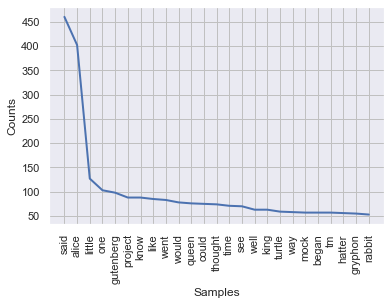

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(25)